<a href="https://colab.research.google.com/github/likevin9911/Python-Projects/blob/main/turtle_race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulated Turtle Race in Python. Keeps track of wins and losses of each turtle

In [2]:
import math
import random
import turtle
import time

In [3]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ghostscript is already the newest version (9.55.0~dfsg1-0ubuntu5.6).
python3-tk is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


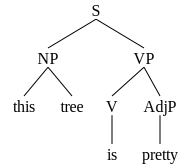

In [4]:
%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk
!pip install svgling
chunked_sentence = '(S (NP this tree) (VP (V is) (AdjP pretty)))'
from nltk.tree import Tree
from IPython.display import display
tree = Tree.fromstring(str(chunked_sentence))
display(tree)

In [7]:
import random
import time
from IPython.display import clear_output

WIDTH, HEIGHT = 500, 500
turtles = 10

class Racer:
    def __init__(self, color):
        self.color = color
        self.position = 0

    def move(self):
        self.position += random.randrange(1, 20)

def setup_file(name, colors):
    with open(name, 'w') as file:
        for color in colors:
            file.write(color + ' 0\n')

def display_race(racers):
    for racer in racers:
        print(f"{racer.color}: {'-' * (racer.position // 10)} {racer.position}")

def start_game():
    colors = ["red", "green", "blue", "pink", "yellow", "black", "orange", "grey", "brown", "purple"]
    racers = [Racer(color) for color in colors[:turtles]]

    run = True
    while run:
        for racer in racers:
            racer.move()

        max_distance = max(racers, key=lambda r: r.position).position
        winners = [r.color for r in racers if r.position >= max_distance]

        display_race(racers)
        time.sleep(0.5)

        if max_distance >= 230:
            print("The winner is: ", ', '.join(winners))
            run = False

    update_scores(winners)

def update_scores(winners):
    old_scores = []
    with open('scores.txt', 'r') as file:
        for line in file:
            l = line.split()
            color = l[0]
            score = int(l[1])
            old_scores.append([color, score])

    with open('scores.txt', 'w') as file:
        for entry in old_scores:
            if entry[0] in winners:
                entry[1] += 1
            file.write(f"{entry[0]} {entry[1]}\n")

if __name__ == "__main__":
    setup_file('scores.txt', ["red", "green", "blue", "pink", "yellow", "black", "orange", "grey", "brown", "purple"])
    while True:
        start = input("Would you like to play? (yes/no) ").lower()
        if start == 'yes':
            start_game()
        else:
            break


Would you like to play? (yes/no) yes
red:  1
green: - 18
blue:  5
pink: - 17
yellow: - 19
black:  9
orange:  5
grey: - 10
brown: - 19
purple: - 11
red:  5
green: -- 27
blue: - 15
pink: -- 22
yellow: --- 33
black: - 11
orange: -- 20
grey: - 13
brown: -- 22
purple: -- 26
red: - 12
green: ---- 41
blue: - 18
pink: ---- 40
yellow: ---- 42
black: -- 29
orange: -- 23
grey: - 18
brown: --- 35
purple: --- 36
red: - 14
green: ---- 45
blue: -- 22
pink: ---- 48
yellow: ----- 57
black: ---- 46
orange: -- 25
grey: --- 37
brown: --- 39
purple: ---- 47
red: -- 23
green: ----- 59
blue: --- 36
pink: ----- 56
yellow: ------- 75
black: ----- 57
orange: ---- 41
grey: ---- 42
brown: ---- 48
purple: ----- 56
red: --- 36
green: ------ 61
blue: ---- 40
pink: ----- 58
yellow: -------- 83
black: ------ 66
orange: ----- 51
grey: ----- 53
brown: ------ 64
purple: ------ 66
red: ---- 47
green: ------- 73
blue: ----- 58
pink: ------ 60
yellow: -------- 85
black: -------- 85
orange: ------ 66
grey: ------- 72
brown: 

In [5]:
WIDTH, HEIGHT = 500, 500

turtles = 10


#turtle.screensize(WIDTH, HEIGHT)

class Racer:
  def __init__(self, color, pos):
    self.pos = pos
    self.color = color
    self.turt = turtle.Turtle()
    self.turt.shape('turtle')
    self.turt.penup()
    self.turt.color(color)
    self.turt.setpos(pos)
    self.turt.setheading(90)

  def move(self):
    r = random.randrange(1, 20)
    self.pos = (self.pos[0], self.pos[1] + r)
    self.turt.pendown()
    self.turt.forward(r)

  def reset(self):
    self.turt.penup()
    self.turt.setpos(self.pos)

def setupFile(name, colors):
  file = open(name, 'w')
  for color in colors:
    file.write(color + ' 0\n')
  file.close()

def startGame():
  tList = []
  turtle.reset()
  turtle.hideturtle()
  colors = ["red", "green", "blue", 'pink', 'yellow', 'black', 'orange', 'grey', 'brown', 'purple']
  start = -(WIDTH/2) + 20
  for t in range(turtles):
    newPosX = start + t*(HEIGHT)//turtles
    tList.append(Racer(colors[t],(newPosX, -230)))
    tList[t].turt.showturtle()
  run = True

  while run:
    for t in tList:
      t.move()

    maxColor = []
    maxDis = 0
    for t in tList:
      if t.pos[1] > 230 and t.pos[1] > maxDis:
        maxDis = t.pos[1]
        maxColor.append(t.color)
      elif t.pos[1] > 230 and t. pos[1] == maxDis:
        maxDis = t.pos[1]
        maxColor.append(t.color)

    if len(maxColor) > 0:
      run = False
      print("The winner is: ")
      for win in maxColor:
        print(win)

  oldScore = []
  file = open('scores.txt', 'r')
  for line in file:
    l = line.split()
    color = l[0]
    score = int(l[1])
    oldScore.append([color, score])

  file.close()

  file = open('scores.txt', 'w')

  for entry in oldScore:
    for winner in maxColor:
      if entry[0] == winner:
        entry[1] = int(entry[1]) +1

    file.write(str(entry[0]) + ' ' + str(entry[1]) + '\n')


if __name__ == "__main__":

  setupFile('scores.txt', ["red", "green", "blue", "pink", "yellow", "black",
                            "orange", "grey", "brown", "purple"])
  while True:
      start = input("Would you like to play? (yes/no) ").lower()
      if start == 'yes':
          startGame()
      else:
          break





# def num_racers():
#   racers = 0
#   while True:
#     racers = input('Enter the number of racers: ')
#     if racers.isdigit(): # check input if number
#       racers = int(racers)
#     else:
#       print('Please type a number!')
#       continue # goes back up to while loop

#     if 2 <= racers <= 12:
#       return racers
#     else:
#       print('Number not in range (2-12)')


Would you like to play? (yes/no) yes
The winner is: 
blue
brown
Would you like to play? (yes/no) no
